## Feature Engineering


*   The fourth project is the development of a notebook (code + explanation) that successfully engineers 12 unique types of features, **three** for each type of feature engineering: **transforming**, **interacting**, **mapping**, and **extracting**.
* The second part of the assignment is the development of a **deep learning classification** model to predict the direction of the S&P500 for the dates **2018-01-01—2018-07-12** (test set).
* The feature engineering section is unrelated to the model section, you can develop any features, not just features that would work for deep learning models (later on you can decide which features to use in your model).
*  You also have to uncomment all the example features and make them run successfully  → **every** feature example has some error/s that you have to fix. Please also describe the error you fixed!
*   Note that we *won't* be attempting to measure the quality of every feature (i.e., how much it improves the model), that is slightly too advanced for this course.


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings("ignore")

Preparing the Data

In [125]:
# preparing our data
raw_prices = pd.read_csv("https://storage.googleapis.com/sovai-public/random/assetalloc.csv", sep=';', parse_dates=True, index_col='Dates', dayfirst=True)
df = raw_prices.sort_values(by='Dates')
df["target"] = df["SP500"].pct_change().shift(-1)
df["target"] = np.where(df["target"]>0,1,0)
df.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,target
Dates,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,101.936,154.38,117.50,1636.57,133.584,286.67,0
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.69,1642.94,135.052,287.03,1
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.62,1659.11,137.134,285.63,0
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.89,1656.86,137.037,284.69,1
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.28,1662.76,136.914,284.21,0


### Train Test Split

In [126]:
from sklearn.model_selection import train_test_split
y = df.pop("target")
X = df.copy()

X_train = X[X.index.astype(str)<'2018-01-01']
y_train = y[X_train.index]
X_test = X[~X.index.isin(X_train.index)]
y_test = y[X_test.index]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Transforming

1. Refresh your mind on tranformation methods by going back to the material. I am simply providing 1 example here.
1. Don't repeat my logarithmic return calculation, develop your own transformation (there are 1000s of types of transformations).
1. In the example I provide, there is also an error that you have to fix. For example, one of the errors below is that you should actually use `np.log1p()`, but there is another one, so watch out!

In [127]:
# Example Transforming (has errors)

# Name: Logarithmic return of FTSE
# Description: Developing the logarithmic return feature for use within linear models that make normality assumptions.

# For training set
#change to log1p
#also we should calculated the log return instead of the log price. Since we
#alreadey to the train test split, we should apply to the train and test set to avoid data leaking
X_train["FTSE_log"] = np.log1p(X_train["FTSE"].pct_change())
X_train["FTSE_log"] = X_train["FTSE_log"].fillna(0)
X_test["FTSE_log"] = np.log1p(X_test["FTSE"].pct_change())
X_test["FTSE_log"] = X_test["FTSE_log"].fillna(0)


In [128]:
## Transforming 1 (Add code below)
#name: log daily return
#for this feature, I calculated the difference between current time and previous time. 
X_train['FTSE_daily_diff'] = X_train['FTSE'].diff()
X_train['FTSE_daily_diff'].fillna(X_train['FTSE_daily_diff'].mean(), inplace=True)
X_test['FTSE_daily_diff'] = X_test['FTSE'].diff()
X_test['FTSE_daily_diff'].fillna(X_test['FTSE_daily_diff'].mean(), inplace=True)


X_train['SP500_daily_return'] = np.log(X_train['SP500']).pct_change()
X_train['SP500_daily_return'].fillna(X_train['SP500_daily_return'].mean(), inplace=True)
X_test['SP500_daily_return'] = np.log(X_test['SP500']).pct_change()
X_test['SP500_daily_return'].fillna(X_test['SP500_daily_return'].mean(), inplace=True)

In [129]:
## Transforming 2 (Add code below)
#name: rolling calculation
#roll the window with size 30(monthly data) and calculated the monthy mean and standard deviation
N = 30
# Compute rolling mean and standard deviation
X_train['FTSE_MA30_Mean'] = X_train['FTSE'].rolling(window=N).mean()
X_train['FTSE_MA30_Std'] = X_train['FTSE'].rolling(window=N).std()
X_test['FTSE_MA30_Mean'] = X_test['FTSE'].rolling(window=N).mean()
X_test['FTSE_MA30_Std'] = X_test['FTSE'].rolling(window=N).std()

In [130]:
## Transforming 3 (Add code below)
#name: standardize daily return
#do standardize transformation of the data that has mean of 0 and standard deviation 
#of 1 to avoid outliers and large numbers compared to other fetaures.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
FTSE_train = X_train["FTSE"].values.reshape(-1, 1)
FTSE_test = X_test["FTSE"].values.reshape(-1, 1)
scaler.fit(FTSE_train)
scaler.fit(FTSE_test)
X_train["FTSE_scaled"] = scaler.transform(FTSE_train)
X_test["FTSE_scaled"] = scaler.transform(FTSE_test)

### Interacting

There are millions of possible interaction methods, be creative and come up with your own. For this assignment there is no 'right' feature engineering method, you simply develop one, and give it a name and a discreption.

In [131]:
# Example Interacting (has errors)

# Name: Ratio of Gold return to 10Y treasury
# Desciption: Both gold and treasuries are safe-haven assets and descrepency in their ratio could be a sign of some marco-economic event.

def gold_to_yield(df):
   #since this will cause zero division error and result a -inf value, I add an additional
   #minus the minimum value*0.0001 as a verry small change as a zero division gaurd
   #another error I fixed is to call percentage change on gold returns as well.
   teny_returns = df["US-10Y"].pct_change() - df['US-10Y'].pct_change().min()*0.0001 
   gold_returns = df["Gold"].pct_change()
   df["gold_r__div__teny_r"] = gold_returns/teny_returns
   df["gold_r__div__teny_r"].iloc[0] = 0
   return df
X_train = gold_to_yield(X_train)
X_test = gold_to_yield(X_test)

In [132]:
## Interacting 1 (Add code below)
#name: Genetic programming transformation on new features
#generates new features by evolving original data features using predefined mathematical operations and 
#effectively learns the patterns of the data and create new features based on the input function set. 
from gplearn.genetic import SymbolicTransformer
def gp_features(X_train, X_test, num_gen=10, num_comp=12):
    function_set = ["add", "sub", "mul", "div","sqrt", "log", "abs", "neg", "inv", "tan", "max", "min",]
    gp = SymbolicTransformer(
        generations=num_gen, population_size=1000,
                          hall_of_fame=100, n_components=num_comp,
                          function_set=function_set,
                          parsimony_coefficient=0.0005,
                          max_samples=0.9, verbose=1,
                          random_state=0, n_jobs=6,
    )
    gen_feats_train = gp.fit_transform(X_train, y_train)
    gen_feats_test = gp.transform(X_test)
    return gen_feats_train, gen_feats_test 
gp_features(X_train.fillna(0), X_test.fillna(0))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


   0    10.22       0.00991463        7        0.0469475        0.0123121      4.76s
   1     4.81        0.0217679        6        0.0538677        0.0604754      3.47s
   2     4.03        0.0333754        3        0.0547397        0.0492764      3.09s
   3     3.76        0.0364014        9        0.0561957        0.0167916      2.05s
   4     3.39        0.0376698        9        0.0558016        0.0205755      2.33s
   5     3.52         0.038162       11         0.067032        0.0873223      1.93s
   6     3.92        0.0374171        9        0.0577594       0.00444104      1.25s
   7     3.99        0.0373661        5        0.0586255        0.0689813      0.85s
   8     4.24        0.0372423        9        0.0576696       0.00343718      0.41s
   9     4.47         0.037158        9        0.0585356       0.00546533      0.00s


(array([[ 3.51806878e-01,  1.32245872e-02,  3.92889260e+00, ...,
          1.19223883e+02,  3.56273610e-01,  4.45137405e-05],
        [ 3.31049026e-01, -4.38871166e-02, -1.30274517e+01, ...,
         -3.99078225e+02,  3.16217830e-01, -1.47847718e-04],
        [ 3.54805437e-01,  2.28392848e-02,  6.78258240e+00, ...,
          2.11699719e+02,  3.62500977e-01,  7.69077171e-05],
        ...,
        [ 5.01007225e-01,  2.68672787e-01,  7.20746992e+02, ...,
          3.45621240e+03,  5.15794934e-01,  1.00153129e-04],
        [ 5.18145736e-01,  6.23785960e-01,  1.67644972e+03, ...,
          8.09144930e+03,  5.52394383e-01,  2.32102949e-04],
        [ 3.85269725e-01, -1.75951941e+00, -4.70426869e+03, ...,
         -2.30011047e+04,  2.88053614e-01, -6.58106235e-04]]),
 array([[ 4.88565982e-01,  1.13727866e-01,  3.04063960e+02, ...,
          1.48669377e+03,  4.94849618e-01,  4.25371935e-05],
        [ 6.33418750e-01,  2.82491334e+00,  7.61542963e+03, ...,
          3.64502364e+04,  7.87922850e

In [133]:
## Interacting 2 (Add code below)
#name: Multidivision on features
#do both multipulation and division on selected features at the same time.
def muldiv(df, feature_list, feat):
    for feat_two in feature_list:
      if feat==feat_two:
        continue
      else:
       df[feat+"/"+feat_two] = df[feat]/(df[feat_two]) #zero division guard
       df[feat+"_X_"+feat_two] = df[feat]*(df[feat_two])
    return df

X_train= muldiv(X_train, ['FTSE_Small', 'Russel2000', 'FTSE'], 'SP500')
X_test= muldiv(X_test, ['FTSE_Small', 'Russel2000', 'FTSE'], 'SP500')


In [134]:
## Interacting 3 (Add code below)
#name: Rolling Variance
#variance on rolling windows between US bond and french bond. Since both US-10Y and French-10Y are rates,
#I want to do the rolling variance difference to see whether they are related to each other
def rolling_var(df, feat1, feat2):
    df["{}_rolling_var_{}".format(feat1, feat2)] = df[feat1].rolling(window=N).var() - df[feat2].rolling(window=N).var()
    return df
#here I use fillna with the first value after window N instead of dropna since dropna will cause 
#different in size of the df compared to y data sets
X_train = rolling_var(X_train, 'US-10Y', 'French-10Y').fillna(X_train.iloc[N+1])#.dropna()
X_test = rolling_var(X_test, 'US-10Y', 'French-10Y').fillna(X_train.iloc[N+1])#.dropna()

### Mapping

This one is slightly harder, you have to identify other  dimensionality reduction methods, there are many more than just PCA. Maybe you can also look at performing the decompositions just on a single asset classes, e.g., US-2Y, US-5Y, US-10Y, US-30Y is a fixed income asset class, but there are a few others in the dataset.

In [135]:
# Example Mapping (has errors)

# Name: First prinicipal component of all of the assets returns
# Description:For stocks the first component resmbles the return of the market,
#for multiple asset classes it could resemble a 'universal' asset class


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pca_first(X_train, X_test):
   sc = StandardScaler()
   #handle infinities
   X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
   X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
   X_train_s = sc.fit_transform(X_train.fillna(0))
   X_test_s = sc.transform(X_test.fillna(0))
   pca = PCA(1)
   #no need fillna here(following two lines) since numpy.ndarray' object has no attribute 'fillna
   X_train["first_prinicipal"] = pca.fit_transform(X_train_s)
   X_test["first_prinicipal"] = pca.transform(X_test_s)
   return X_train, X_test
X_train, X_test = pca_first(X_train, X_test)

In [136]:
## Mapping 1 (Add code below)
#name:Uniform Manifold Approximation and Projection dimensionality reduction
#dimensionality reduction technique that is very effective at grouping 
#clusters or groups in the data, even if the data structure is complex. Hence, I applied it on the entire df.
#In addition, I choose umap rather tsne because umap has better runtime and flexibility.
import umap
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

def umap_mapping(X_train, X_test):
   # Initialize UMAP
   reducer = umap.UMAP(n_components=1, random_state=42)
   X_train['umap'] = reducer.fit_transform(X_train)
   X_test['umap'] = reducer.fit_transform(X_test)
   return X_train, X_test

X_train, X_test = umap_mapping(X_train, X_test)


In [137]:
## Mapping 2 (Add code below)
#name: Isomap mapping for dimensionality reduction
#Isomap is a non-linear dimensionality reduction method based on the geometric distances between data points. 
#This is considered a manifold learning algorithm and is particularly useful when the data lies on an embedded non-linear 
#manifold within the higher-dimensional space.
def isomap_mapping(X_train, X_test):
   embedding = Isomap(n_components=1)
   X_train['isomap_US'] = embedding.fit_transform(X_train[['US-2Y','US-5Y', 'US-10Y', 'US-30Y']])
   X_test['isomap_US'] = embedding.fit_transform(X_test[['US-2Y','US-5Y', 'US-10Y', 'US-30Y']])
   return X_train, X_test

X_train, X_test = isomap_mapping(X_train, X_test)


In [138]:
## Mapping 3 (Add code below)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

#name: Linear Discrimination dimensionality reduction
#lda is a supervised dimensionality reduction analysis method and is useful 
#when the classes are well separated, so I applied it to the french rates series of features.
def lda_mapping(X_train, X_test):
   lda = LinearDiscriminantAnalysis(n_components=1)
   X_train['lda_French'] = lda.fit_transform(X_train[['French-2Y','French-5Y', 'French-10Y', 'French-30Y']].fillna(0) , y_train)
   X_test['lda_French'] = lda.transform(X_test[['French-2Y','French-5Y', 'French-10Y', 'French-30Y']].fillna(0))
   return X_train, X_test
X_train, X_test = lda_mapping(X_train, X_test)

Extracting

In [139]:
# Example Extracting (has errors)
# Name: Annualized volatility in returns
# Description: We are developing an annualized volatility measure for all asset returns, 
#which is a good measure of market turbulence

def vola(df, window = 252):
   #we should only consider the features in the original df and exclude the synthetic
   #features, otherwise will cause columns that are all NaNs.
   returns_ls = [
       "FTSE", "EuroStoxx50","SP500", "Gold", "French-2Y", "French-5Y", "French-10Y", 
       "French-30Y", "US-2Y", "US-5Y", "US-10Y", "US-30Y", "Russel2000", "EuroStox_Small", "FTSE_Small","MSCI_EM", "CRB",
    ]
   #we should use window size = 252 since there are 252 trading days annually
   volatility = df[returns_ls].pct_change().rolling(window=window).std()*(window**0.5)
   
   new_names = [(i,i+'_vol') for i in df.columns.values]
   volatility.rename(columns = dict(new_names), inplace=True)
   #I also filled NaN with the fist value being calculated, which is the line of the window size.
   #I did not fillna with the mean of entire df since I want to eliminate data leaking
   volatility.fillna(volatility.iloc[252])
   df = pd.concat((df, volatility), axis=1).fillna(df.iloc[252])
   return df

X_train = vola(X_train)
#I delete the transformation on test data here since we only has 100+ rows in test set
#and a rolling window = 252 can not be applied since all columns will turn to NaN
#X_test = vola(X_test)

In [140]:
nan_columns = X_train.isna().all()
print("Columns with all values as NaN:", nan_columns[nan_columns == True])

Columns with all values as NaN: Series([], dtype: bool)


In [141]:
nan_columns = X_test.isna().all()
print("Columns with all values as NaN:", nan_columns[nan_columns == True])

Columns with all values as NaN: Series([], dtype: bool)


In [142]:
## Extracting 1 (Add code below)
#name: Moving max
#calculates the maximum rate monthy and might help with measuring the momentum
def rolling_stats_max(df):
    rolling_mean = df[["US-2Y", "US-5Y", "US-10Y", "US-30Y"]].rolling(window=30).max()
    mean_names = [(i, i + "_mean_30d" )for i in ["US-2Y", "US-5Y", "US-10Y", "US-30Y"]]
    rolling_mean.rename(columns=dict(mean_names), inplace=True)
    df = pd.concat((df, rolling_mean), axis=1)
    #print(df)
    df = df.fillna(df.iloc[30])
    return df
X_train = rolling_stats_max(X_train)
X_test = rolling_stats_max(X_test)


In [143]:
## Extracting 2 (Add code below)
#name: Exponential moving average
#This function calculates the Exponential weighted moving average
# for the same set of columns with a span of 14 days(bi weekly).
def ewma_features(df):
    # Calculate EWMA
    ewma = df[["US-2Y", "US-5Y", "US-10Y", "US-30Y"]].ewm(span=14, adjust=False).mean()
    ewma_names = {i: i + "_ewma_14d" for i in ["US-2Y", "US-5Y", "US-10Y", "US-30Y"]}
    ewma.rename(columns=ewma_names, inplace=True)
    df = pd.concat([df, ewma], axis=1)
    #df = df.fillna(df.iloc[30])
    return df
X_train = ewma_features(X_train)
X_test = ewma_features(X_test)


In [144]:
## Extracting 3 (Add code below)
#name: Moving standard deviation
#This function resamples the data to monthly frequency and calculates the std 
#for the mentioned columns. 
def rolling_stats_std(df):
    rolling_std = df[["US-2Y", "US-5Y", "US-10Y", "US-30Y"]].rolling(window=30).std()
    std_names = [(i, i + "_std_30d") for i in ["US-2Y", "US-5Y", "US-10Y", "US-30Y"]]
    rolling_std.rename(columns=dict(std_names), inplace=True)
    df = pd.concat((df, rolling_std), axis=1)
    df = df.fillna(df.iloc[30])
    return df
X_train = rolling_stats_std(X_train)
X_test = rolling_stats_std(X_test)

In [145]:
X_train.shape

(7543, 64)

In [146]:
X_train_feat = X_train.copy()
X_test_feat = X_test.copy()

## Deep Learning Binary Classification

* For the deep learning model you can perform new data preprocessing methods and new feature engineering that are better suited to neural networks. You can also use all or some of the features you developed above (most features work in deep learning models as long as they are normalized).
* It is very hard to predict the stock price, so in my grading I will look more at the quality of the model you process (e.g., that there is no data leakage, that you performed some hyperparameter tuning).
* Make sure that you switch your GPU on, you have access to it on Colab. The training stage also takes long, you might want to use a smaller amount of data, or fewer epochs at first to speed up your development process.
* After your training is done, you don't have to save your model, but you do have to print the performance of your model. You can report two metrics the ROC(AUC) and the Accuracy against the test set.
* Also remember to set the random seed (random state) so that when I run your software, I get similar results (the results doesn't have to be exactely the same).
* You can choose any type of deep learning archetecture, e.g., LSTM, GRU, CNN, it is up to you.
* Remember that this section is less that 25% of the grade, so don't waste your time here.
* And lastly, remember this is the stock market, so it is **difficult** to have an accuracy above 50%, good luck!

In [286]:
# reload the data
raw_prices = pd.read_csv("https://storage.googleapis.com/sovai-public/random/assetalloc.csv", sep=';', parse_dates=True, index_col='Dates', dayfirst=True)
df = raw_prices.sort_values(by='Dates')
df["target"] = df["SP500"].pct_change().shift(-1)
df["target"] = np.where(df["target"]>0,1,0)
y = df.pop("target")
X = df.copy()

X_train = X[X.index.astype(str)<'2018-01-01']
y_train = y[X_train.index]
X_test = X[~X.index.isin(X_train.index)]
y_test = y[X_test.index]


In [287]:
y_train_feat = y_train.copy()
y_test = y_test.copy()

In [288]:
from sklearn.preprocessing import StandardScaler
#we first perform train test split in the previous cell before do standardization to prevent data leaking
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [289]:
import numpy as np
#from keras.models import Sequential
#from keras.layers.core import Dense
import keras
import keras_tuner as kt
keras.utils.set_random_seed(7)

In [290]:
df.corr

<bound method DataFrame.corr of                FTSE  EuroStoxx50    SP500     Gold  French-2Y  French-5Y  \
Dates                                                                      
1989-02-01  2039.70      875.470   297.09   392.50     99.081     99.039   
1989-02-02  2043.40      878.080   296.84   392.00     98.898     99.117   
1989-02-03  2069.90      884.090   296.97   388.75     98.907     99.002   
1989-02-06  2044.30      885.490   296.04   388.00     98.484     98.502   
1989-02-07  2072.80      883.820   299.63   392.75     98.438     98.312   
...             ...          ...      ...      ...        ...        ...   
2018-07-06  7617.70     3448.490  2759.82  1254.84     90.036    149.257   
2018-07-09  7687.99     3460.442  2784.17  1261.56     90.022    149.158   
2018-07-10  7692.04     3473.311  2793.84  1254.45     90.004    149.059   
2018-07-11  7591.96     3422.348  2774.02  1246.32     89.959    149.040   
2018-07-12  7651.33     3445.493  2798.29  1247.32     8

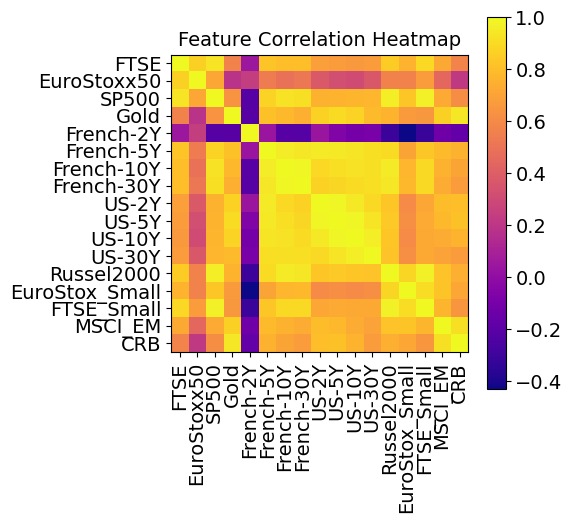

In [291]:

import matplotlib.pyplot as plt
import seaborn as sns

def show_heatmap(data, cmap="inferno"):
    plt.matshow(data.corr(), cmap=cmap)
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()
show_heatmap(df, cmap="plasma")


 Here I want to do a feature selection just as what we did before in the insurance homework. I perform a classification model and plot the feature importance to help me decide which top 9 features I want to choose to put it in the neural network model

Feature Importance:  [0.05992642 0.06103263 0.06726223 0.06404894 0.05671292 0.05391198
 0.05633177 0.05556423 0.05147523 0.05139712 0.05484685 0.05597092
 0.06456638 0.05925425 0.05692895 0.06694656 0.06382263]


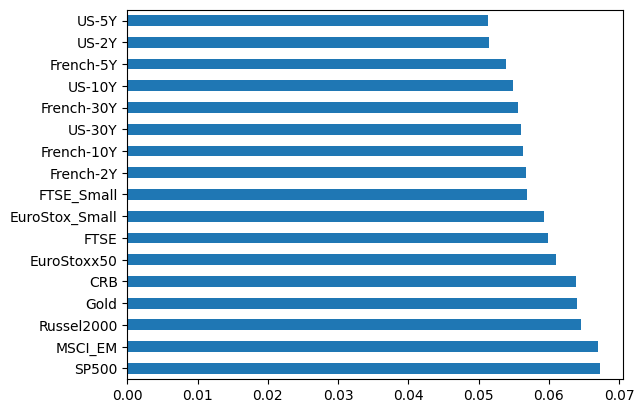

In [292]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Feature Importance: ",rf.feature_importances_)
feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_importances.plot(kind='barh')
plt.show()

In [293]:
feat_importances.index

Index(['SP500', 'MSCI_EM', 'Russel2000', 'Gold', 'CRB', 'EuroStoxx50', 'FTSE',
       'EuroStox_Small', 'FTSE_Small', 'French-2Y', 'French-10Y', 'US-30Y',
       'French-30Y', 'US-10Y', 'French-5Y', 'US-2Y', 'US-5Y'],
      dtype='object')

In [299]:
X_train = X_train[feat_importances.index[:9]]
X_test = X_test[feat_importances.index[:9]]

In [300]:
def moving_window(df, window_size):
    data = []
    for i in range(len(df) - window_size):
        data.append(df.iloc[i : i + window_size].values)
    return np.array(data)

WINDOW_SIZE = 15

X_train = moving_window(X_train, WINDOW_SIZE)
X_test = moving_window(X_test, WINDOW_SIZE)
y_train = y_train[WINDOW_SIZE:]
y_test = y_test[WINDOW_SIZE:]

# Define the Model

In [301]:
def model_builder(hp, window_size=WINDOW_SIZE):
    inputs = keras.Input(shape=(window_size, 9))
    hp_units = hp.Int("units", min_value=16, max_value=64, step=32)
    lstm = keras.layers.LSTM(units=hp_units, return_sequences=True)(inputs)
    lstm2 = keras.layers.LSTM(units=hp_units // 2)(lstm)
    outputs = keras.layers.Dense(1, activation="sigmoid")(lstm2)

    model = keras.Model(inputs=inputs, outputs=outputs)

    hp_learning_rate = hp.Choice("learning_rate", values=[2e-2, 1e-2, 1e-3])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        # optimizer=keras.optimizers.legacy.Adam(learning_rate=hp_learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [302]:
window_size = 15
learning_rate = 0.001
inputs = keras.Input(shape=(window_size, 9))
inputs_nn = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs_nn)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs_nn, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "functional_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_63 (InputLayer)     │ (None, 15, 9)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_53 (LSTM)                  │ (None, 32)                │      5,376 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_40 (Dense)                │ (None, 1)                 │         33 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 5,409 (21.13 KB)

 Trainable params: 5,409 (21.13 KB)

 Non-trainable params: 0 (0.00 B)

# Hyperparameter Tuning

In [303]:
tuner = kt.Hyperband(model_builder, objective="val_accuracy", max_epochs=10, factor=3)
stop_early = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)

Reloading Tuner from ./untitled_project/tuner0.json



# Get the optimal hyperparameters


In [304]:
tuner.search(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[stop_early]
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(
    f"Best units: {best_hps.get('units')}, best learning rate: {best_hps.get('learning_rate')}"
)

Best units: 32, best learning rate: 0.01


In [305]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[stop_early]
)
val_mse_per_epoch = history.history['val_accuracy']

Epoch 1/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4985 - loss: 0.6985 - val_accuracy: 0.5323 - val_loss: 0.6910
Epoch 2/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5141 - loss: 0.6929 - val_accuracy: 0.5323 - val_loss: 0.6911
Epoch 3/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5161 - loss: 0.6926 - val_accuracy: 0.5323 - val_loss: 0.6911
Epoch 4/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5240 - loss: 0.6925 - val_accuracy: 0.5323 - val_loss: 0.6911
Epoch 5/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5225 - loss: 0.6924 - val_accuracy: 0.5323 - val_loss: 0.6910
Epoch 6/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5214 - loss: 0.6925 - val_accuracy: 0.5323 - val_loss: 0.6910


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


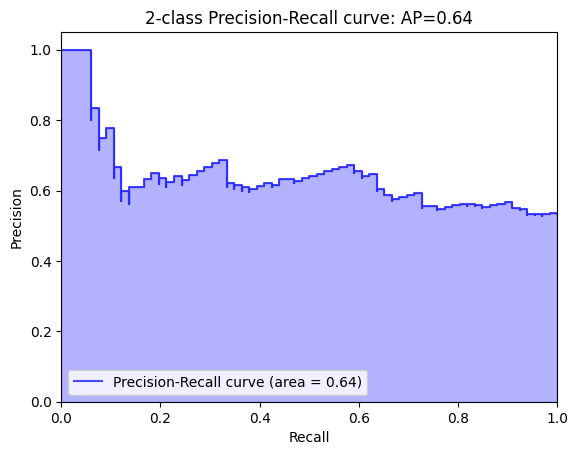

In [306]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
plt.figure()
plt.step(recall, precision, where='post', color='b', alpha=0.7,
         label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()


In [307]:
y_pred_binary = np.where(y_pred > 0.5, 1, 0).reshape(-1)
accuracy = np.mean(y_pred_binary == y_test)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 53.23%


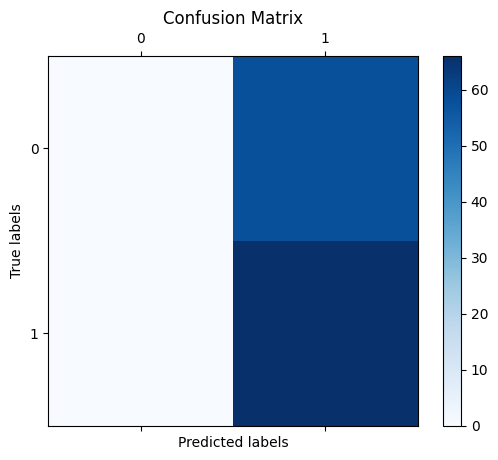

In [308]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + [0, 1])
ax.set_yticklabels([''] + [0, 1])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



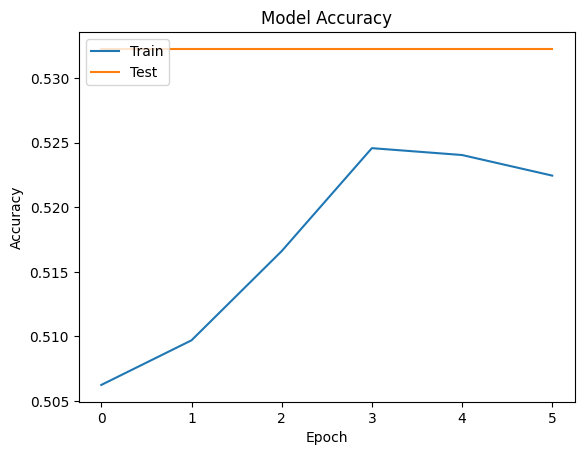

In [309]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


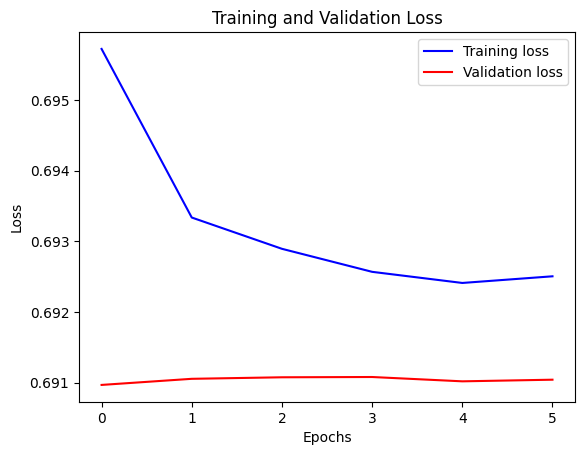

In [310]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")